In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

# Data Preparation
The goal of this document is to make the data ready for machine learning techniques. Our main goal is defining the factors that have a high correlation with symmetry and music. Then looking at if we can combine these factors to a single leading factor or use multiple factors in machine learning models.

**This notebook uses two test subjects:**
- Test subject 1: has a lot of data but claims to not be susceptible for music influences
- Test subject 2: has less data but claims to be highly susceptible for music influences\

**Data info:**
- Test subject 1: 245.724 rows × 95 columns
- Test subject 2: 17.840 rows × 95 columns

## Previous cleaning steps
--add text--

# Loading in the data

In [2]:
df1 = pd.read_csv('Test_persoon1/Prepped_output/subject_1_pod_symmetry_per_step.csv')
df2 = pd.read_csv('Test_persoon2/Prepped_output/subject_2_pod_symmetry_per_step.csv')

In [17]:
# Turning t from object to datetime
df1['t'] = pd.to_datetime(df1['t'])
# Adding two new columns, time difference in seconds & The frequency hertz
df1['diff'] = df1.t.diff()
df1['diff_seconds'] = df1['diff'].dt.total_seconds()
df1['frequency_hz'] = 1 / df1['diff_seconds']
df1 = df1.drop(columns = 'diff')
#Dropping first row because of the NULL Values in Time difference
df1 = df1.iloc[1: , :]

In [18]:
# Turning t from object to datetime
df2['t'] = pd.to_datetime(df2['t'])
# Adding two new columns, time difference in seconds & The frequency hertz
df2['diff'] = df2.t.diff()
df2['diff_seconds'] = df2['diff'].dt.total_seconds()
df2['frequency_hz'] = 1 / df2['diff_seconds']
df2 = df2.drop(columns = 'diff')
#Dropping first row because of the NULL Values in Time difference
df2 = df2.iloc[1: , :]

## Dividing the columns in groups
To make it easier to work with, the 95 columns are seperated into groups.
- Footpod
- Symmetry
- Pitch
- Timbre
- Song

In [19]:
df1.columns

Index(['Unnamed: 0', 't', 'pronation_left', 'braking_left', 'impact_left',
       'contact_time_left', 'flight_ratio_left', 'strike_left', 'power_left',
       'pronation_right', 'braking_right', 'impact_right',
       'contact_time_right', 'flight_ratio_right', 'strike_right',
       'power_right', 'initial_foot', 'bad_half_step', 'bad_not_running',
       'bad_not_flat', 'track_uri', 'bad_no_music', 'position', 'session_id',
       'bout_idx', 'pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa',
       'timbre_1_mean', 'timbre_1_std', 'timbre_2_mean', 'timbre_2_std',
       'timbre_3_mean', 'timbre_3_std', 'timbre_4_mean', 'timbre_4_std',
       'timbre_5_mean', 'timbre_5_std', 'timbre_6_mean', 'timbre_6_std',
       'timbre_7_mean', 'timbre_7_std', 'timbre_8_mean', 'timbre_8_std',
       'timbre_9_mean', 'timbre_9_std', 'timbre_10_mean', 'timbre_10_std',
       'timbre_11_mean', 'timbre_11_std', 'timbre_12_mean', 'timbre_12

In [21]:
#Footpod Dataframe
df_foot1 = df1[['t', 'session_id', 'pronation_left', 'braking_left', 'impact_left',
       'contact_time_left', 'flight_ratio_left', 'strike_left', 'power_left',
       'pronation_right', 'braking_right', 'impact_right',
       'contact_time_right', 'flight_ratio_right', 'strike_right',
       'power_right', 'initial_foot', 'diff_seconds', 'frequency_hz']]
#Symmetry Dataframe
df_sym1 = df1[['t','pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa']]
#Timbre Dataframe
df_timbre1 = df1[['t', 'timbre_1_mean', 'timbre_1_std', 'timbre_2_mean', 'timbre_2_std',
       'timbre_3_mean', 'timbre_3_std', 'timbre_4_mean', 'timbre_4_std',
       'timbre_5_mean', 'timbre_5_std', 'timbre_6_mean', 'timbre_6_std',
       'timbre_7_mean', 'timbre_7_std', 'timbre_8_mean', 'timbre_8_std',
       'timbre_9_mean', 'timbre_9_std', 'timbre_10_mean', 'timbre_10_std',
        'timbre_11_mean', 'timbre_11_std', 'timbre_12_mean', 'timbre_12_std']]
#Pitch Dataframe
df_pitch1 = df1[['t','pitch_1_mean', 'pitch_1_std', 'pitch_2_mean', 'pitch_2_std',
       'pitch_3_mean', 'pitch_3_std', 'pitch_4_mean', 'pitch_4_std',
       'pitch_5_mean', 'pitch_5_std', 'pitch_6_mean', 'pitch_6_std',
       'pitch_7_mean', 'pitch_7_std', 'pitch_8_mean', 'pitch_8_std',
       'pitch_9_mean', 'pitch_9_std', 'pitch_10_mean', 'pitch_10_std',
       'pitch_11_mean', 'pitch_11_std', 'pitch_12_mean', 'pitch_12_std']]
#Song Dataframe
df_song1 = df1[['t','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]
# Symmetry and song Dataframe
df_sym_song1 = df1[['t','pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

In [22]:
#Footpod Dataframe
df_foot2 = df2[['t', 'session_id', 'pronation_left', 'braking_left', 'impact_left',
       'contact_time_left', 'flight_ratio_left', 'strike_left', 'power_left',
       'pronation_right', 'braking_right', 'impact_right',
       'contact_time_right', 'flight_ratio_right', 'strike_right',
       'power_right', 'initial_foot', 'diff_seconds', 'frequency_hz']]
#Symmetry Dataframe
df_sym2 = df2[['t','pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa']]
#Timbre Dataframe
df_timbre2 = df2[['t', 'timbre_1_mean', 'timbre_1_std', 'timbre_2_mean', 'timbre_2_std',
       'timbre_3_mean', 'timbre_3_std', 'timbre_4_mean', 'timbre_4_std',
       'timbre_5_mean', 'timbre_5_std', 'timbre_6_mean', 'timbre_6_std',
       'timbre_7_mean', 'timbre_7_std', 'timbre_8_mean', 'timbre_8_std',
       'timbre_9_mean', 'timbre_9_std', 'timbre_10_mean', 'timbre_10_std',
        'timbre_11_mean', 'timbre_11_std', 'timbre_12_mean', 'timbre_12_std']]
#Pitch Dataframe
df_pitch2 = df2[['t','pitch_1_mean', 'pitch_1_std', 'pitch_2_mean', 'pitch_2_std',
       'pitch_3_mean', 'pitch_3_std', 'pitch_4_mean', 'pitch_4_std',
       'pitch_5_mean', 'pitch_5_std', 'pitch_6_mean', 'pitch_6_std',
       'pitch_7_mean', 'pitch_7_std', 'pitch_8_mean', 'pitch_8_std',
       'pitch_9_mean', 'pitch_9_std', 'pitch_10_mean', 'pitch_10_std',
       'pitch_11_mean', 'pitch_11_std', 'pitch_12_mean', 'pitch_12_std']]
#Song Dataframe
df_song2 = df2[['t','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]
# Symmetry and song Dataframe
df_sym_song2 = df2[['t','pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

# Correlations
As previously stated, the goal is to find a correlation between music and running symmetry. Another goal of us is too look at running efficiency and if there is a correlation. 

When reading a paper about correlations, there are two highly used ones. The most commen Pearson, the default of the .corrr function. Less commen the Spearman function that ranks the data to find a correlation.

*Link: https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f#:~:text=When%20the%20correlation%20coefficient%20is,between%20variable%20X%20and%20Y.&text=If%20X%20and%20Y%20are,strong%20relationship%20between%20two%20variables.*

## Test subject 1: Pearson correlation heatmap

In [23]:
mask1 = np.triu(np.ones_like(df_sym_song1.corr(), dtype=np.bool))

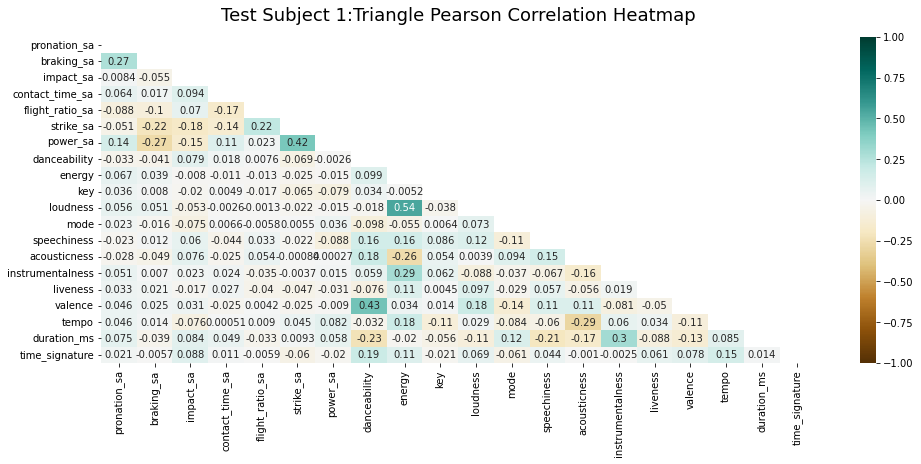

In [30]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df_sym_song1.corr(), mask=mask1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Test Subject 1:Triangle Pearson Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Test subject 2: Pearson correlation heatmap

In [27]:
mask2 = np.triu(np.ones_like(df_sym_song2.corr(), dtype=np.bool))

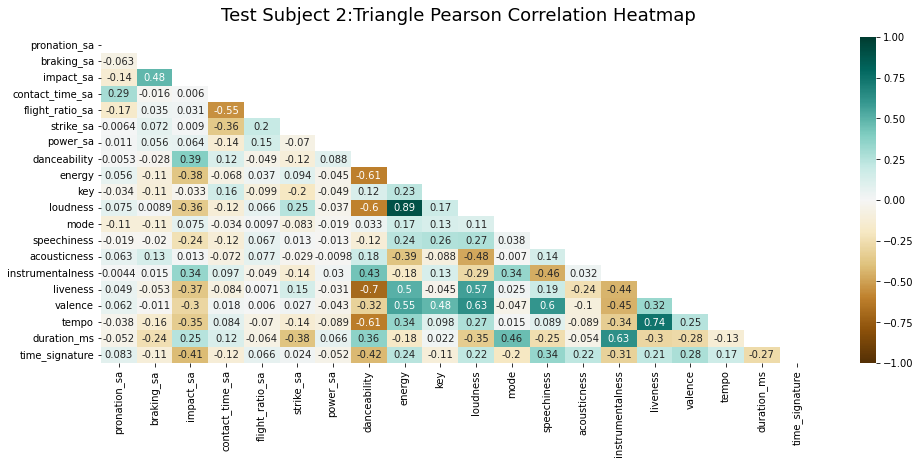

In [29]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df_sym_song2.corr(), mask=mask2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Test Subject 2:Triangle Pearson Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Thoughts pearson correlation
Looking at both correlation matrix, it does look that the hypothesis is correct. Test subject 1 has a low correlation response rate compared to test subject 2. This can also be due to the high datasize difference of test subject 1 and 2. Dancebility has the highest correlation rate on multiple factors.

## Test subject 2: Spearman correlation heatmap

In [31]:
mask1 = np.triu(np.ones_like(df_sym_song1.corr('spearman'), dtype=np.bool))

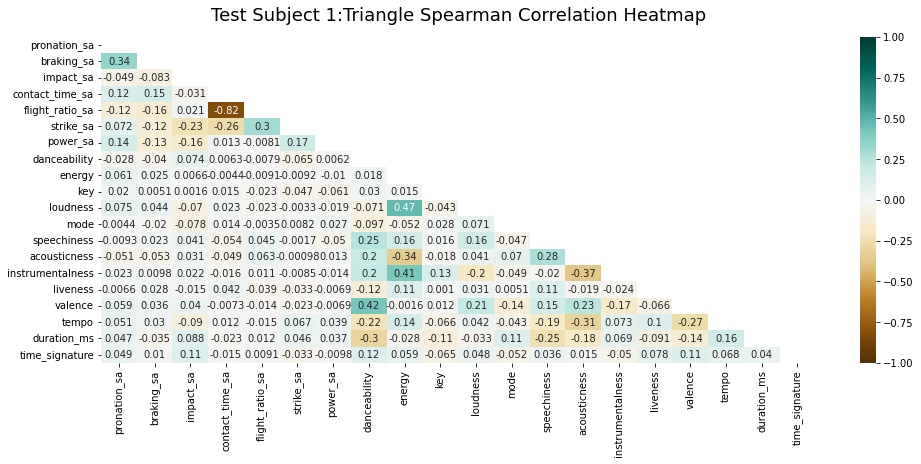

In [32]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df_sym_song1.corr('spearman'), mask=mask1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Test Subject 1:Triangle Spearman Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Test subject 2: Spearman correlation heatmap

In [33]:
mask2 = np.triu(np.ones_like(df_sym_song2.corr('spearman'), dtype=np.bool))

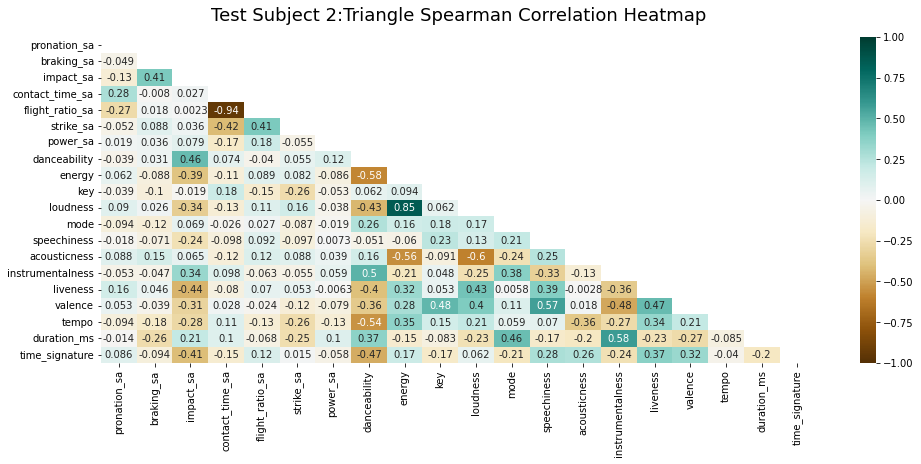

In [34]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df_sym_song2.corr('spearman'), mask=mask2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Test Subject 2:Triangle Spearman Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Thoughts Spearman correlation
Same as the previous correlation matrix test subject 1, doens't seem to respond on music. Except when using the Spearman correlation 'danceability' is highlighted for test subject 1. With test subject 2 more factors have a higher correlation, especially 'impact_sa'. But a overall increase in music correlation metrics.

## Adding average symmetry
Making a new column that takes the combined average of all symetry scores and then check what the correlation is.

In [36]:
df_sym_song1['avg_sa'] = df_sym_song1[['pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa']].mean(axis=1)

df_sym_song2['avg_sa'] = df_sym_song2[['pronation_sa', 'braking_sa', 'impact_sa',
       'contact_time_sa', 'flight_ratio_sa', 'strike_sa', 'power_sa']].mean(axis=1)

C:\Users\arwen\AppData\Local\Temp/ipykernel_24168/255328544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sym_song1['avg_sa'] = df_sym_song1[['pronation_sa', 'braking_sa', 'impact_sa',
C:\Users\arwen\AppData\Local\Temp/ipykernel_24168/255328544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sym_song2['avg_sa'] = df_sym_song2[['pronation_sa', 'braking_sa', 'impact_sa',


In [37]:
df_sym_song1['avg_sa'].head()

2    0.001308
3    0.004161
4    0.005632
5    0.005740
6   -0.004435
Name: avg_sa, dtype: float64

## Test Subject 1: Feature Pearson Correlation with 'Avg_sa'

In [1]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_sym_song1.corr()[['impact_sa']].sort_values(by='impact_sa', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Pearson Correlating with avg_sa', fontdict={'fontsize':18}, pad=16);

NameError: name 'plt' is not defined

## Test Subject 2: Feature Pearson Correlation with 'Avg_sa'

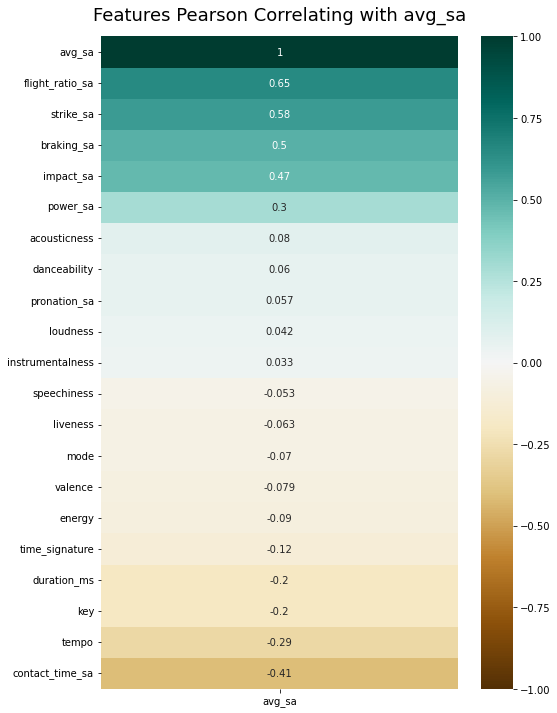

In [39]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_sym_song2.corr()[['avg_sa']].sort_values(by='avg_sa', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Pearson Correlating with avg_sa', fontdict={'fontsize':18}, pad=16);

## Test Subject 1: Feature Spearman Correlation with 'Avg_sa'

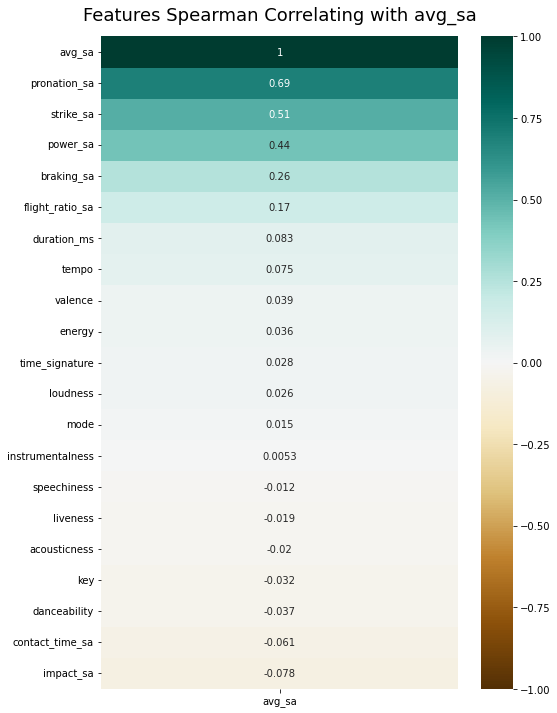

In [41]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_sym_song1.corr('spearman')[['avg_sa']].sort_values(by='avg_sa', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Spearman Correlating with avg_sa', fontdict={'fontsize':18}, pad=16);

## Test Subject 2: Feature Spearman Correlation with 'Avg_sa'

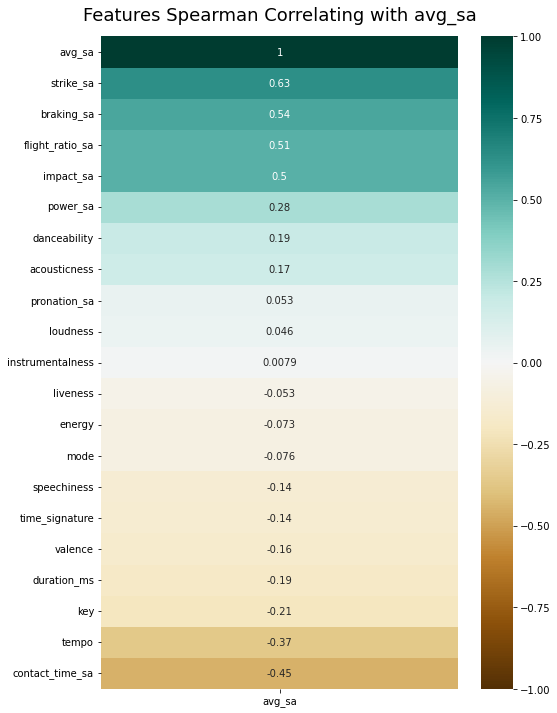

In [42]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_sym_song2.corr('spearman')[['avg_sa']].sort_values(by='avg_sa', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Spearman Correlating with avg_sa', fontdict={'fontsize':18}, pad=16);

# Thoughts of the average feature correlation
Looking at the correlation between different symmetry features, 'pronation_sa' and 'strike_sa' have the most impact on the average symmetry score. Meaning that if pronation or strike deviate a lot, the average symmetry will be highly impacted.

Checking out the other features that are not directly correlated with symmetry, shows that there is no high correlation between other positive features and average symmetry. Looking at negative correlations test subject 2 shows to have a negative correlation for average symmetry on the 'Tempo' feature.